### แนวทางการทำ EDA
1. MIN-MAX Date ของข่าวแต่ละหมวด รวมถึงจำนวนข่าวในระยะเวลา 3 เดือนย้อนหลังแยกรายหมวดข่าว
2. ความถี่ของข่าวในแต่ละวัน แยกเส้นรายหมวด (Time series line)
3. ยอด View Min-Max-Avg-Sd
4. ยอด Share Min-Max-Avg-Sd
5. Scatter view vs share
6. Sentiment header และ Content

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

In [3]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [4]:
import numpy as np
import time
from datetime import datetime
from datetime import timedelta
import pandas as pd
import json
import pymongo
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["BADS7101"]
q_c_urlList = mydb["URL_LIST_CRIME"]
i_c_scrape = mydb["CRIME_NEWS"]

q_p_urlList = mydb["URL_LIST_POLITIC"]
i_p_scrape = mydb["POLITIC_NEWS_U"]


q_e_urlList = mydb["URL_LIST_ENTER"]
i_e_scrape = mydb["ENTERTAIN_NEWS"]

#### Descriptive data ข่าวอาชญากรรม

In [3]:
cursor_crime = q_c_urlList.find()
cursor_crime_s = i_c_scrape.find()

df_crime_url = pd.DataFrame(cursor_crime)
df_crime_detail = pd.DataFrame(cursor_crime_s)
df_crime_join = pd.merge(df_crime_url,df_crime_detail,how="inner",on=['URL'])
df_crime_join.insert(0,'Category',value='Crime')

In [4]:
print('Min time:',min(df_crime_url.newsdate))
print('Max time',max(df_crime_url.newsdate))

Min time: 2020-05-31 17:11:00
Max time 2020-11-07 16:20:00


In [5]:
df_crime_detail.describe()

,totalView,totalShare,share_fb,share_tw,share_gp
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,10095.208451,38.494836,12.868545,13.628169,11.998122
std,20268.734419,32.240407,11.355648,13.005376,9.715115
min,523.000000,7.000000,2.000000,2.000000,2.000000
25%,3034.000000,25.000000,8.000000,8.000000,8.000000
50%,4842.000000,31.000000,10.000000,11.000000,10.000000
75%,9276.000000,40.000000,14.000000,14.000000,13.000000
max,278285.000000,398.000000,133.000000,163.000000,131.000000


#### Descriptive data ข่าวการเมือง

In [6]:
cursor_pol = q_p_urlList.find()
cursor_pol_s = i_p_scrape.find()

df_pol_url = pd.DataFrame(cursor_pol)
df_pol_detail = pd.DataFrame(cursor_pol_s)
df_pol_join = pd.merge(df_pol_url,df_pol_detail,how="inner",on=['URL'])
df_pol_join.insert(0,'Category',value='Politic')

In [7]:
print('Min time:',min(df_pol_url.newsdate))
print('Max time',max(df_pol_url.newsdate))

Min time: 2020-08-07 14:50:00
Max time 2020-11-07 22:15:00


In [8]:
df_pol_detail.describe()

,totalView,totalShare,share_fb,share_tw,share_gp
count,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000
mean,3821.031718,23.167582,12.063187,5.652847,5.445554
std,9966.970128,93.557906,91.505933,8.572791,5.513482
min,233.000000,0.000000,0.000000,0.000000,0.000000
25%,1185.000000,10.000000,4.000000,3.000000,3.000000
50%,1656.500000,14.000000,5.000000,4.000000,4.000000
75%,3103.250000,18.000000,7.000000,5.000000,6.000000
max,267321.000000,2140.000000,2120.000000,218.000000,95.000000


#### Descriptive data ข่าวบันเทิง

In [9]:
cursor_ent = q_e_urlList.find()
cursor_ent_s = i_e_scrape.find()

df_ent_url = pd.DataFrame(cursor_ent)
df_ent_detail = pd.DataFrame(cursor_ent_s)
df_ent_join = pd.merge(df_ent_url,df_ent_detail,how="inner",on=['URL'])
df_ent_join.insert(0,'Category',value='Entertain')

In [10]:
print('Min time:',min(df_ent_url.newsdate))
print('Max time',max(df_ent_url.newsdate))

Min time: 2020-03-17 13:30:00
Max time 2020-11-07 18:52:00


In [11]:
df_ent_detail.describe()

,totalView,totalShare,share_fb,share_tw,share_gp
count,1022.000000,1022.000000,1022.000000,1022.00000,1022.000000
mean,16036.824853,58.001957,17.162427,23.22407,17.610568
std,40714.761226,101.758774,25.727439,62.45175,27.919098
min,121.000000,4.000000,1.000000,1.00000,1.000000
25%,3478.000000,28.000000,9.000000,9.00000,8.000000
50%,6622.500000,36.000000,11.000000,13.00000,11.000000
75%,13241.500000,52.000000,16.000000,20.00000,16.000000
max,639069.000000,1760.000000,354.000000,1660.00000,403.000000


### Plot กราฟ

In [12]:
df_plotViz = pd.concat([df_crime_join,df_pol_join,df_ent_join],ignore_index=True)

In [13]:
df_plotViz.insert(6,'newsdate_date',value=None)
df_plotViz['newsdate_date'] = df_plotViz['newsdate'].dt.date

In [14]:
cat_ratio = df_plotViz.groupby(['Category']).agg({'URL': lambda x: len(x)}).reset_index()
cat_ratio

,Category,URL
0,Crime,1065
1,Entertain,1022
2,Politic,4010


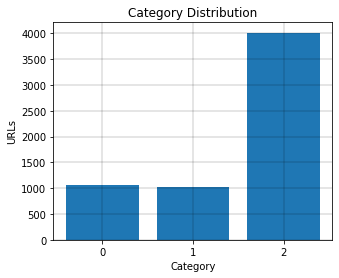

In [15]:
plt.figure(figsize=(5,4))
plt.grid(color='k', linestyle='-', linewidth=0.2)
x=range(3)
plt.bar(x, cat_ratio.URL)
plt.xticks(cat_ratio.index)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('URLs')
plt.show()

In [16]:
# count URLs by day
df_plotLine = df_plotViz.groupby(['newsdate_date','Category']).count()[['URL']]
df_plotLine.reset_index(inplace=True)

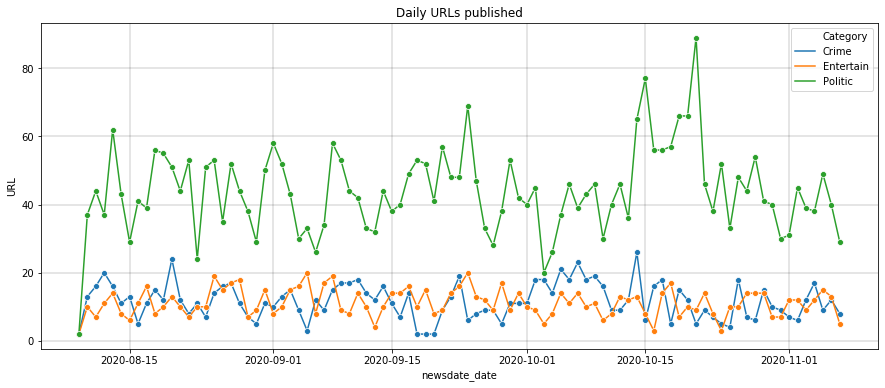

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.grid(color='k', linestyle='-', linewidth=0.2)
sns.lineplot(data=df_plotLine, x="newsdate_date", y="URL",hue="Category", marker="o")
ax.set_title('Daily URLs published')
plt.show()

จากกราฟจะพบว่า ข่าวการเมืองพุ่งสูงขึ้น ตั้งแต่วันที่ 14-19 ตุลาคม63 ซึ่งเป็นช่วงที่มีการชุมนุมต่อเนื่อง จนถึงวันที่ 21 ตุลาคม<br>
ที่มีการชุมนุมใหญ่ที่อนุสาวรีย์ ก่อนเดินขบวนประชิดทำเนียบรัฐบาล ในขณะที่ข่าวอาชญากรรมคงที่

In [6]:
def plotScatter(df):
    fig, ax = plt.subplots(2, 2, figsize=(14, 14))
    sns.color_palette("Paired")
    sns.scatterplot(ax=ax[0,0],data=df, x='totalView', y='totalShare', hue='Category')
    ax[0,0].set_title('Overview')
    ax[0,0].grid(color='k', linestyle='-', linewidth=0.2)
    sns.scatterplot(ax=ax[0,1],data=df, x='totalView', y='share_fb', hue='Category')
    ax[0,1].set_title('Facebook')
    ax[0,1].grid(color='k', linestyle='-', linewidth=0.2)
    sns.scatterplot(ax=ax[1,0],data=df, x='totalView', y='share_tw', hue='Category')
    ax[1,0].set_title('Twitter')
    ax[1,0].grid(color='k', linestyle='-', linewidth=0.2)
    sns.scatterplot(ax=ax[1,1],data=df, x='totalView', y='share_gp', hue='Category')
    ax[1,1].set_title('Google+')
    ax[1,1].grid(color='k', linestyle='-', linewidth=0.2)

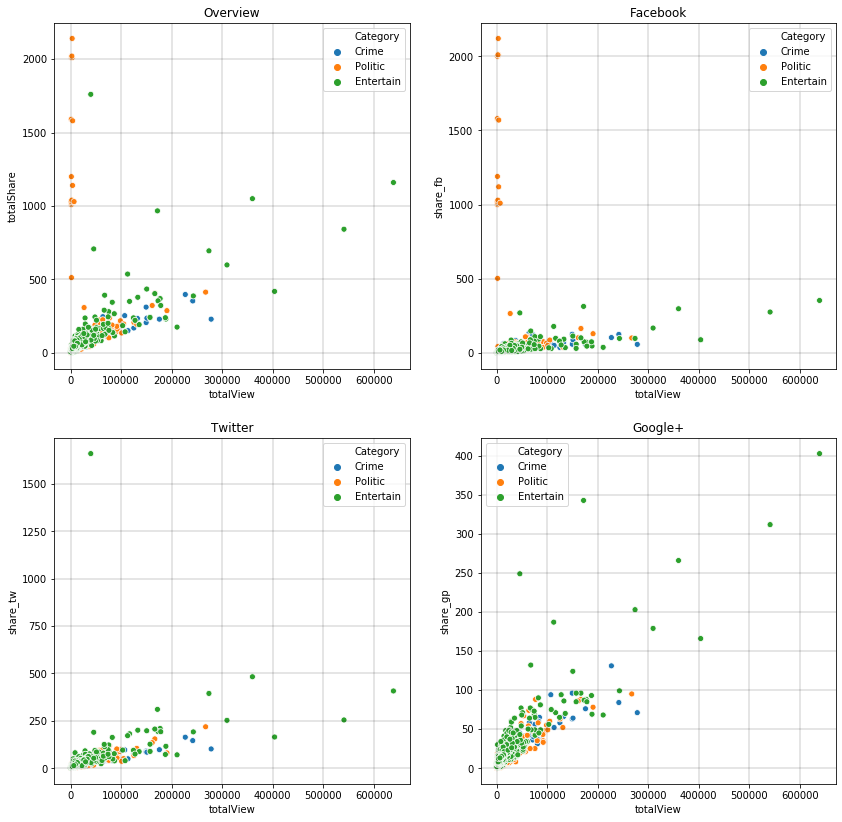

In [19]:
plotScatter(df_plotViz)

Slice เอา totalShare ต่ำกว่า 500

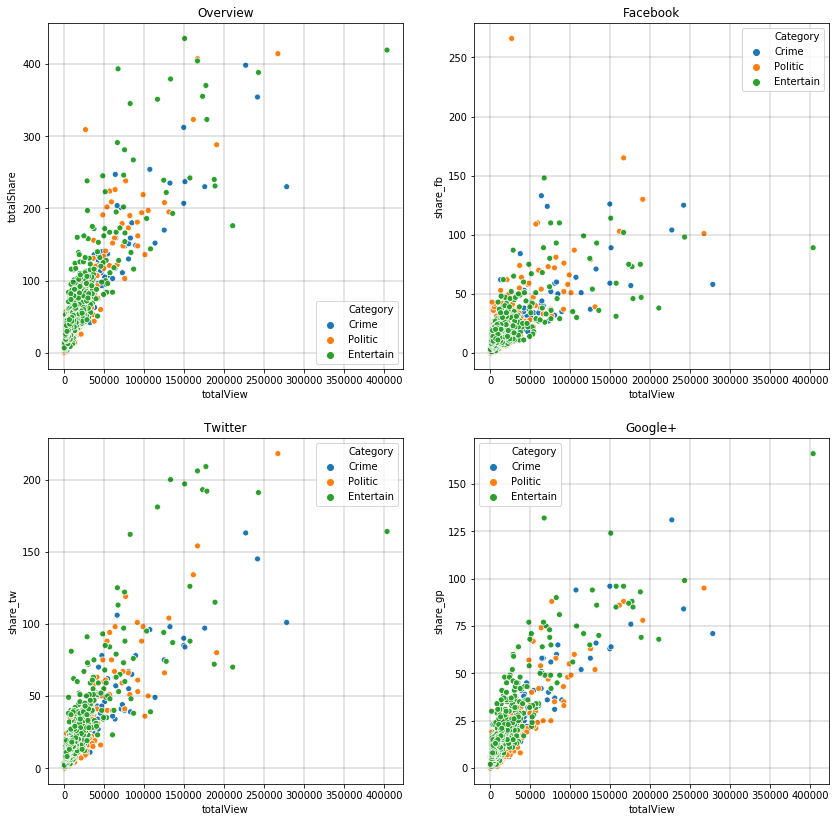

In [20]:
df_scatter = df_plotViz[df_plotViz.totalShare<500]
plotScatter(df_scatter)

Slice เอา totalShare มากกว่า 500

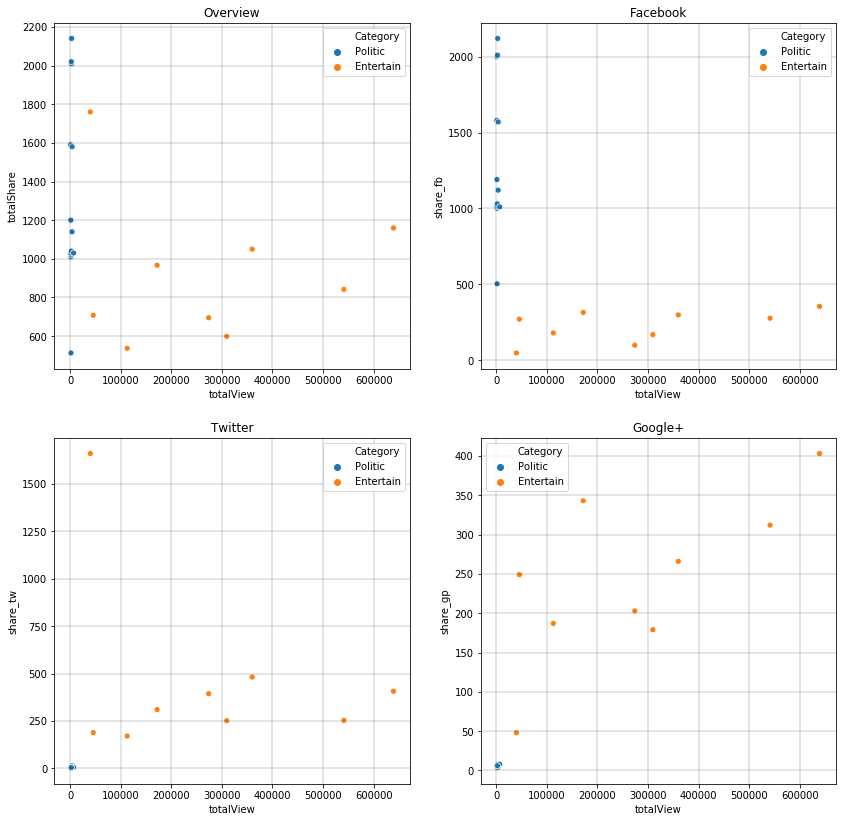

In [21]:
df_scatter = df_plotViz[df_plotViz.totalShare>=500]
plotScatter(df_scatter)

### เช็ค Share > View (เคสไม่ปกติ)

In [22]:
df_plotViz[df_plotViz.totalShare>=df_plotViz.totalView]

,Category,_id_x,timestamp,URL,headline,newsdate,newsdate_date,_id_y,totalView,totalShare,share_fb,share_tw,share_gp,text
1330,Politic,5fa6cc7052e52341a96bec3a,2020-11-07 23:33:43.357,https://www.dailynews.co.th/politics/804372,ปชช.เชื่อมีต่างชาติ-นักการเมืองหนุนหลังม็อบ,2020-11-01 11:18:00,2020-11-01,5fa916a00f49c8ddce633861,1305,1590.0,1580.0,2.0,5,เมื่อวันที่ 1 พ.ย. สำนักวิจัยซูเปอร์โพล นำเสนอ...
3919,Politic,5fa91c5f019e3d90e8937cd8,2020-11-09 17:39:19.639,https://www.dailynews.co.th/politics/793630,'ซูเปอร์โพล'ชี้ปชช.หนุนแก้รธน. ให้รัฐบาลอยู่ไม...,2020-09-05 10:47:00,2020-09-05,5fa98354dd3811252624930e,1737,2010.0,2000.0,4.0,4,เมื่อวันที่ 5 ก.ย. สำนักวิจัยซูเปอร์โพลเปิดเผย...


### Top 10 View

In [23]:
df_plotViz.sort_values(by='totalView',ascending=False).head(10)

,Category,_id_x,timestamp,URL,headline,newsdate,newsdate_date,_id_y,totalView,totalShare,share_fb,share_tw,share_gp,text
5955,Entertain,5fa6d9ea52e52341a96bf66f,2020-11-08 00:31:12.029,https://www.dailynews.co.th/entertainment/791455,ซูมจนเครื่องเออร์เรอร์ 'เมย์-พิชญ์นาฏ'ใส่บิกิน...,2020-08-23 21:17:00,2020-08-23,5faa17dd04b88d22320a8194,639069,1160.0,354.0,407.0,403,ปกติก็เป็นอีกหนึ่งสาวที่สวยและแซ่บจนเป็นที่ยอม...
5973,Entertain,5fa6da0452e52341a96bf681,2020-11-08 00:31:40.278,https://www.dailynews.co.th/entertainment/791145,พริกที่ว่าเผ็ดยังไม่เด็ดเท่าเธอ 'กวาง' อวดหุ่น...,2020-08-21 17:14:00,2020-08-21,5faa18b504b88d22320a81a6,541194,842.0,276.0,254.0,312,ยังหาคำนิยามให้กับความแซ่บของนักแสดงและนางแบบส...
5823,Entertain,5fa6d93652e52341a96bf5eb,2020-11-08 00:28:10.609,https://www.dailynews.co.th/entertainment/793270,"""เจนนี่""ขอโทษหลังแซวแรง ""คนสงขลามีผัวตั้งแต่ป.4""",2020-09-03 08:56:00,2020-09-03,5faa11d604b88d22320a8110,403836,419.0,89.0,164.0,166,เมื่อวันที่ 3 ก.ย. กลายเป็นกระแสดราม่าอีกครั้ง...
5111,Entertain,5fa6d57352e52341a96bf31a,2020-11-08 00:12:10.235,https://www.dailynews.co.th/entertainment/805038,เผ็ดกรุบกริบ!'นนนี่'ลูก'แอน-สิเรียม' นุ่งบิกิน...,2020-11-04 16:51:00,2020-11-04,5fa9eeb604b88d22320a7e48,359960,1050.0,298.0,482.0,266,ยิ่งโตยิ่งสวยของจริง สำหรับสาว นนนี่-นนลนีย์ ล...
5574,Entertain,5fa6d7dc52e52341a96bf4f1,2020-11-08 00:22:25.101,https://www.dailynews.co.th/entertainment/796964,บังเอิญปีเกิดตรงกับฝาหีบศพ บอลเฉลยเลขเด็ด'โรเบ...,2020-09-23 07:56:00,2020-09-23,5faa063404b88d22320a8017,309590,599.0,168.0,252.0,179,"จากกรณีการเสียชีวิตของดาวตลกชื่อดัง ""โรเบิร์ต ..."
1038,Crime,5fa6c69952e52341a96be7e6,2020-11-07 23:08:48.480,https://www.dailynews.co.th/crime/789383,รับสิ้นชีวิตติดหรูจนหนี้ท่วม ใช้'แป๊บ'แทนปืนชิ...,2020-08-11 17:42:00,2020-08-11,5fa83ffbe8687d6eb8729333,278285,230.0,58.0,101.0,71,เมื่อวันที่ 11 ส.ค. จากกรณีคนร้ายแต่งกายมิดชิด...
5818,Entertain,5fa6d93652e52341a96bf5e6,2020-11-08 00:28:10.609,https://www.dailynews.co.th/entertainment/793281,ส่องความแซ่บ'อิงอิง' นักศึกษาคนสนิท'เป๊ก'สามี'...,2020-09-03 09:44:00,2020-09-03,5faa119b04b88d22320a810b,273889,695.0,98.0,394.0,203,กลายเป็นประเด็นร้อนแรง ทำเอาเหล่าคนวงการบันเทิ...
2789,Politic,5fa6d40b52e52341a96bf1ee,2020-11-08 00:06:11.192,https://www.dailynews.co.th/politics/798508,โปรดเกล้าฯถอดยศตำรวจ เรียกคืนเครื่องราชฯ 10 ราย,2020-09-30 22:35:00,2020-09-30,5fa916a00f49c8ddce633e16,267321,414.0,101.0,218.0,95,เมื่อวันที่ 30 ก.ย. ราชกิจจานุเบกษาเผยแพร่ประ...
5361,Entertain,5fa6d6b952e52341a96bf41c,2020-11-08 00:17:34.701,https://www.dailynews.co.th/entertainment/800468,'สินจัย'เปิดใจกดไลค์ 'น้องกัน'ควงหนุ่มคนสนิทเท...,2020-10-11 18:42:00,2020-10-11,5fa9fbd804b88d22320a7f42,243000,388.0,98.0,191.0,99,เมื่อวันที่ 11 ต.ค. เรียกได้ว่าเป็นเรื่องราวดี...
387,Crime,5fa6c35052e52341a96be55b,2020-11-07 22:54:46.976,https://www.dailynews.co.th/crime/799405,'ทนายเดชา'ไม่โกรธถูกทัวร์ลง ขออภัยที่ตัดสินใจผ...,2020-10-06 10:30:00,2020-10-06,5fa821a6e8687d6eb87290a8,241825,354.0,125.0,145.0,84,ยังอยู่ในกระแสความสนใจของประชาชน สำหรับประเด็น...


### Top 10 Share

In [24]:
df_plotViz.sort_values(by='totalShare',ascending=False).head(10)

,Category,_id_x,timestamp,URL,headline,newsdate,newsdate_date,_id_y,totalView,totalShare,share_fb,share_tw,share_gp,text
1669,Politic,5fa6ce2352e52341a96bed8d,2020-11-07 23:40:57.039,https://www.dailynews.co.th/politics/802933,ซูเปอร์โพลชี้'บิ๊กตู่'ยังสอบผ่าน ประชาชนเชื่อม...,2020-10-24 11:14:00,2020-10-24,5fa916a00f49c8ddce6339b3,3171,2140.0,2120.0,7.0,4,เมื่อวันที่ 24 ต.ค. สำนักวิจัยซูเปอร์โพล (SUPE...
4808,Politic,5fa920b0019e3d90e8938051,2020-11-09 17:57:45.322,https://www.dailynews.co.th/politics/790143,'ซูเปอร์โพล'เผยผลสำรวจ ม็อบต้องเลิกล่วงละเมิดส...,2020-08-16 11:57:00,2020-08-16,5fa9ae93dd38112526249685,2548,2020.0,2010.0,5.0,6,เมื่อวันที่ 16 ส.ค. สำนักวิจัย “ซูเปอร์โพล” นำ...
3878,Politic,5fa91c2e019e3d90e8937cae,2020-11-09 17:38:31.196,https://www.dailynews.co.th/politics/793810,'ซูเปอร์โพล'ชี้คนไทยส่วนใหญ่ ไม่เอา'รัฐบาลแห่ง...,2020-09-06 13:24:00,2020-09-06,5fa9813cdd381125262492e5,2172,2020.0,2000.0,6.0,7,เมื่อวันที่ 6 ก.ย.สำนักวิจัยซูเปอร์โพล นำเสนอผ...
4534,Politic,5fa91f51019e3d90e8937f3f,2020-11-09 17:51:52.790,https://www.dailynews.co.th/politics/791218,'ซูเปอร์โพล'ชี้คนไทยต้องปกป้องสถาบัน-มีดีกว่าช...,2020-08-22 10:07:00,2020-08-22,5fa9a18fdd38112526249573,3084,2010.0,2010.0,3.0,4,เมื่อวันที่ 22 ส.ค.สำนักวิจัยซูเปอร์โพล นำเสนอ...
3919,Politic,5fa91c5f019e3d90e8937cd8,2020-11-09 17:39:19.639,https://www.dailynews.co.th/politics/793630,'ซูเปอร์โพล'ชี้ปชช.หนุนแก้รธน. ให้รัฐบาลอยู่ไม...,2020-09-05 10:47:00,2020-09-05,5fa98354dd3811252624930e,1737,2010.0,2000.0,4.0,4,เมื่อวันที่ 5 ก.ย. สำนักวิจัยซูเปอร์โพลเปิดเผย...
5959,Entertain,5fa6d9f752e52341a96bf673,2020-11-08 00:31:26.987,https://www.dailynews.co.th/entertainment/791426,พาใจหวิวแค่เห็นผ้าปลิว 'เอื้อย-พรสวรรค์'อวดควา...,2020-08-23 16:25:00,2020-08-23,5faa180504b88d22320a8198,39987,1760.0,47.0,1660.0,48,ก่อนหน้านี้ก็เพิ่งจะอวดความสวยเป๊ะในชุดว่ายน้ำ...
1330,Politic,5fa6cc7052e52341a96bec3a,2020-11-07 23:33:43.357,https://www.dailynews.co.th/politics/804372,ปชช.เชื่อมีต่างชาติ-นักการเมืองหนุนหลังม็อบ,2020-11-01 11:18:00,2020-11-01,5fa916a00f49c8ddce633861,1305,1590.0,1580.0,2.0,5,เมื่อวันที่ 1 พ.ย. สำนักวิจัยซูเปอร์โพล นำเสนอ...
2032,Politic,5fa6d01d52e52341a96beef8,2020-11-07 23:49:24.986,https://www.dailynews.co.th/politics/801719,โพลเผยร้อยละ92.8ชี้'ม็อบ' ซ้ำเติมให้เศรษฐกิจไท...,2020-10-18 11:05:00,2020-10-18,5fa916a00f49c8ddce633b1b,4104,1580.0,1570.0,8.0,4,เมื่อวันที่ 18 ต.ค. ผศ.ดร.นพดล กรรณิกา ผอ.สำนั...
2437,Politic,5fa6d23e52e52341a96bf08e,2020-11-07 23:58:31.842,https://www.dailynews.co.th/politics/800253,ภาพคนไทยน้อมรำลึกร.9-ร.5 เป็นสิ่งดีมีความสุขเด...,2020-10-10 12:34:00,2020-10-10,5fa916a00f49c8ddce633cb6,1541,1200.0,1190.0,4.0,3,เมื่อวันที่ 10 ต.ค. สำนักวิจัยซูเปอร์โพล (SUPE...
5955,Entertain,5fa6d9ea52e52341a96bf66f,2020-11-08 00:31:12.029,https://www.dailynews.co.th/entertainment/791455,ซูมจนเครื่องเออร์เรอร์ 'เมย์-พิชญ์นาฏ'ใส่บิกิน...,2020-08-23 21:17:00,2020-08-23,5faa17dd04b88d22320a8194,639069,1160.0,354.0,407.0,403,ปกติก็เป็นอีกหนึ่งสาวที่สวยและแซ่บจนเป็นที่ยอม...


## KAPOOK

In [56]:
q_k_urlList = mydb["SENTIMENT_KAPOOK"]
i_k_scrape = mydb["SENTIMENT_KAPOOK_API"]

In [57]:
cursor_kp = q_k_urlList.find()
#cursor_i_kp = i_k_scrape.find()

df_kp = pd.DataFrame(cursor_kp)

In [58]:
#print(df_kp.taxonomy.unique())

df_kp = df_kp[df_kp.taxonomy.isin(['women/ดารา','women','movie/ข่าววงการหนัง','wedding/งานแต่งดารา','movie/Gossip Star(ซุบซิบดารา)'
                                                              ,'baby/แม่-ลูกดารา','home/บ้านดารา','drama/ข่าวละคร','musicstation/ข่าววงการเพลง','men/HotGirls'
                                                              ,'women/รูปภาพ','men/เกาะติดคนดังชาย','drama','pet/สัตว์เลี้ยงดารา','drama/เรื่องย่อละคร'
                                                              ,'women/ผู้หญิงน่ารู้','women/เมนูอาหาร'])]

In [60]:
print('Min time:',min(df_kp.article_date))
print('Max time',max(df_kp.article_date))

Min time: 2019-12-31 17:09:35
Max time 2020-10-24 04:16:31


In [62]:
g = datetime.strptime(str('2020-07-01 00:00:00'), '%Y-%m-%d %H:%M:%S')
df_kp = df_kp[df_kp.article_date>=g]

In [64]:
df_kp.shape

(1972, 14)

In [83]:
df_kp.describe()

,view,share,image_count,share/view
count,1972.000000,1972.000000,1972.000000,1972.000000
mean,24300.001014,489.090771,4.433063,0.021959
std,21733.121489,2322.775787,2.457778,0.101725
min,378.000000,0.000000,0.000000,0.000000
25%,11172.750000,65.000000,3.000000,0.003799
50%,17943.500000,133.000000,4.000000,0.008090
75%,29665.750000,318.500000,5.000000,0.018639
max,229673.000000,88294.000000,22.000000,3.772442


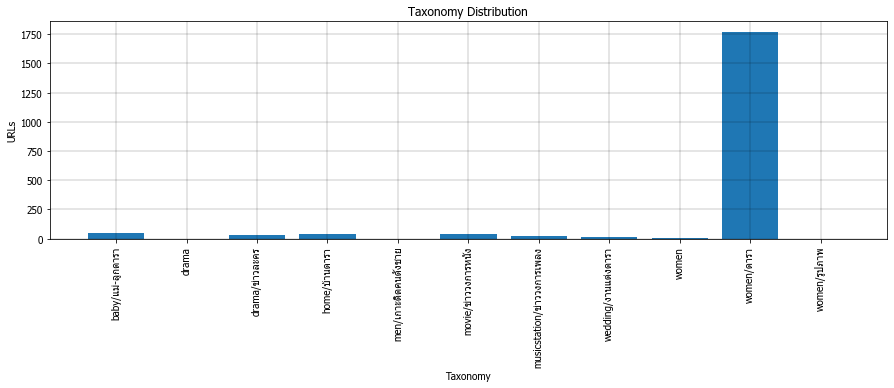

In [68]:
cat_ratio = df_kp.groupby(['taxonomy']).agg({'link': lambda x: len(x)}).reset_index()
plt.figure(figsize=(15,4))
plt.grid(color='k', linestyle='-', linewidth=0.2)
x=cat_ratio.taxonomy
plt.bar(x, cat_ratio.link)
plt.xticks(cat_ratio.index,rotation='vertical')
plt.title('Taxonomy Distribution')
plt.xlabel('Taxonomy')
plt.ylabel('URLs')
plt.show()

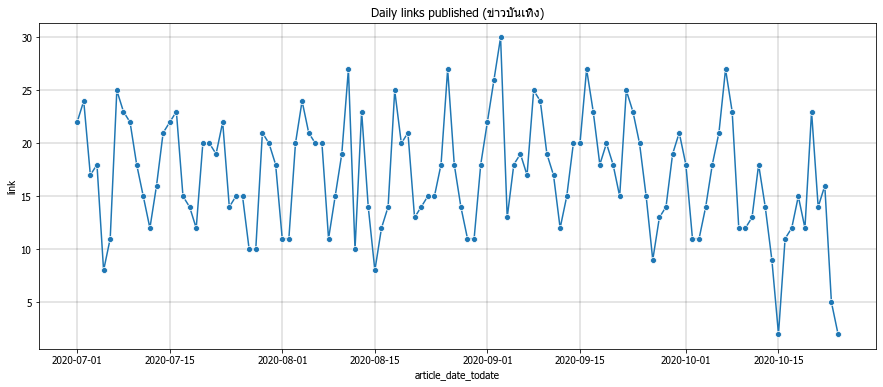

In [82]:
df_plotLine = df_kp.copy()
df_plotLine['article_date_todate'] = df_plotLine['article_date'].dt.date
df_plotLine = df_plotLine.groupby(['article_date_todate']).count()[['link']]
df_plotLine.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(15, 6))
ax.grid(color='k', linestyle='-', linewidth=0.2)
sns.lineplot(data=df_plotLine, x="article_date_todate", y="link", marker="o")
ax.set_title('Daily links published (ข่าวบันเทิง)')
plt.show()

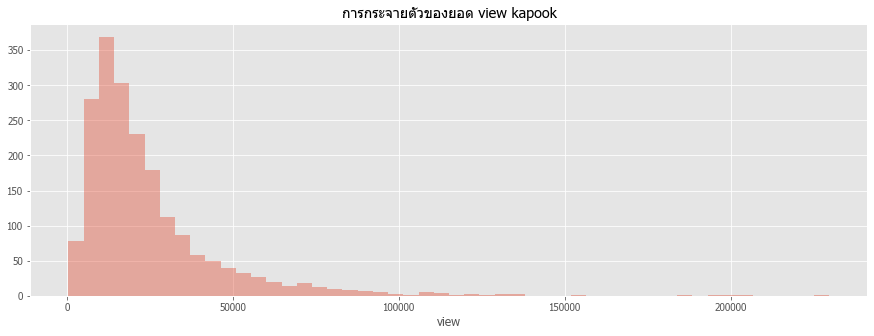

In [168]:
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.distplot(df_kp.view, kde=False)
ax.set_title('การกระจายตัวของยอด view kapook')
plt.show()

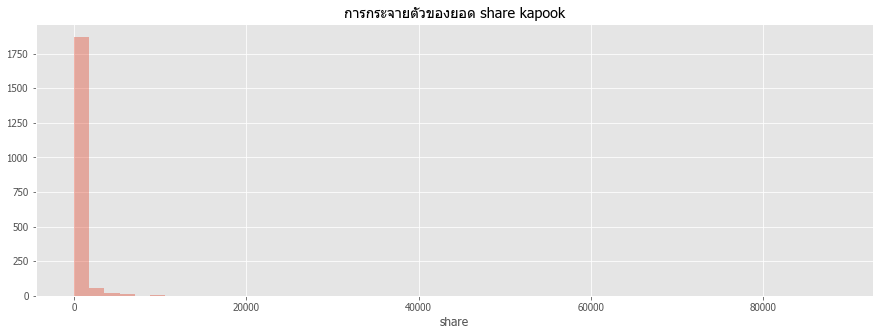

In [169]:
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.distplot(df_kp.share, kde=False)
ax.set_title('การกระจายตัวของยอด share kapook')
plt.show()

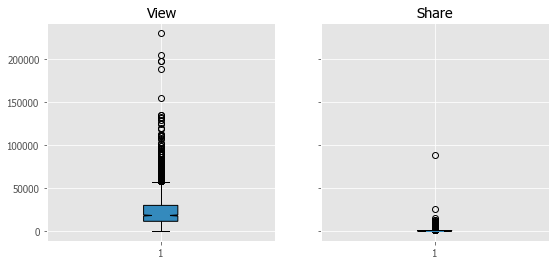

In [182]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)
axes[0].boxplot(df_kp.view, notch=True,  patch_artist=True)
axes[0].set_title('View')
axes[1].boxplot(df_kp.share, notch=True,  patch_artist=True)
axes[1].set_title('Share')
plt.show()

## COMBINATION

In [21]:
q_all = mydb["SENTIMENT_ALL_SOURCE"]
cursor_all = q_all.find()
df_all = pd.DataFrame(cursor_all)

In [22]:
df_en = df_all[df_all.Category == 'Entertain']
df_po = df_all[df_all.Category == 'Politic']

In [23]:
df_en['share_per_view'] = df_en['totalShare']/df_en['totalView']
df_po['share_per_view'] = df_po['totalShare']/df_po['totalView']

In [24]:
df_en.describe()

,totalView,totalShare,hl_sentiment_score,t_sentiment_score,dateDiff,avg_share_per_day,avg_view_per_day,avg_share_per_view,hl_neg_count,hl_pos_count,t_neg_count,t_pos_count,share_per_view
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,36855.142232,1641.932166,61.073239,93.062363,42.216630,48.637660,1681.882849,0.061031,1.061269,0.954048,15.695842,14.080963,0.061031
std,30680.943867,4640.443427,32.783698,15.153961,30.957369,99.253162,2065.308961,0.205251,1.197846,1.017430,20.500253,11.819550,0.205251
min,2103.000000,18.000000,0.000000,0.000000,1.000000,7.714286,39.739583,0.001269,0.000000,0.000000,0.000000,0.000000,0.001269
25%,14494.000000,338.000000,60.000000,95.520000,14.000000,11.461538,450.166667,0.012858,0.000000,0.000000,4.000000,7.000000,0.012858
50%,26538.000000,762.000000,66.670000,99.770000,38.000000,19.285714,969.280000,0.025804,1.000000,1.000000,10.000000,11.000000,0.025804
75%,51568.000000,1585.000000,85.710000,100.000000,65.000000,44.666667,2071.600000,0.053841,2.000000,1.000000,19.000000,16.000000,0.053841
max,229673.000000,88294.000000,99.310000,100.000000,116.000000,1024.777778,16818.666667,3.772442,6.000000,5.000000,160.000000,85.000000,3.772442


In [25]:
df_po.describe()

,totalView,totalShare,hl_sentiment_score,t_sentiment_score,dateDiff,avg_share_per_day,avg_view_per_day,avg_share_per_view,hl_neg_count,hl_pos_count,t_neg_count,t_pos_count,share_per_view
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,11976.202186,107.797814,38.285829,83.180729,11.480874,11.174521,1591.840062,0.036978,0.602914,0.289617,10.406193,6.887067,0.036973
std,29529.109441,373.342973,36.285537,24.954159,19.412589,92.127040,3894.890145,0.170466,0.796245,0.541946,12.204643,7.245310,0.170438
min,540.000000,7.000000,0.000000,0.000000,1.000000,1.571429,11.989796,0.001218,0.000000,0.000000,0.000000,0.000000,0.001218
25%,1273.000000,12.000000,0.000000,72.730000,4.000000,2.125000,305.600000,0.003174,0.000000,0.000000,3.000000,2.000000,0.003174
50%,3017.000000,17.000000,66.670000,94.740000,6.000000,3.250000,590.750000,0.005401,0.000000,0.000000,6.000000,5.000000,0.005401
75%,7747.000000,31.000000,66.670000,99.870000,9.000000,6.400000,1246.000000,0.009544,1.000000,0.000000,14.000000,10.000000,0.009544
max,313770.000000,3010.000000,96.000000,100.000000,113.000000,2140.000000,49658.000000,1.775811,4.000000,3.000000,98.000000,54.000000,1.775811


In [26]:
# ตัดที่ Q3
#df_en = df_en[df_en.avg_share_per_view >= 0.053841]
#df_po = df_po[df_po.avg_share_per_view >= 0.009544]

In [27]:
cat_en_ratio = df_en.groupby(['hl_polarity']).agg({'URL': lambda x: len(x)}).reset_index()
cat_en_ratio

,hl_polarity,URL
0,,94
1,negative,187
2,positive,176


In [28]:
cat_po_ratio = df_po.groupby(['hl_polarity']).agg({'URL': lambda x: len(x)}).reset_index()
cat_po_ratio

,hl_polarity,URL
0,,256
1,negative,202
2,positive,91


In [29]:
df_en_pos = df_en[df_en.hl_polarity=='positive']
df_en_neg = df_en[df_en.hl_polarity=='negative']
df_po_pos = df_po[df_po.hl_polarity=='positive']
df_po_neg = df_po[df_po.hl_polarity=='negative']

In [43]:
#print('หลังตัด Q3')
print('จำนวนข่าวรวม :',df_en.shape[0]+df_po.shape[0])
print('จำนวนข่าวบันเทิง :',df_en.shape[0])
print('จำนวนข่าวการเมือง :',df_po.shape[0])
print('=================================')
print('หลังตัด Neutral')
print('จำนวนข่าวรวม :',df_en_pos.shape[0]+df_en_neg.shape[0]+df_po_pos.shape[0]+df_po_neg.shape[0])
print('จำนวนข่าวบันเทิง :',df_en_pos.shape[0]+df_en_neg.shape[0])
print('จำนวนข่าวการเมือง :',df_po_pos.shape[0]+df_po_neg.shape[0])

จำนวนข่าวรวม : 1006
จำนวนข่าวบันเทิง : 457
จำนวนข่าวการเมือง : 549
หลังตัด Neutral
จำนวนข่าวรวม : 656
จำนวนข่าวบันเทิง : 363
จำนวนข่าวการเมือง : 293


In [44]:
df_join = pd.concat([df_en_pos,df_en_neg,df_po_pos,df_po_neg],ignore_index=True)
seqNum = list(range(0,df_join.shape[0]))
df_join.insert(0,'Transction',seqNum)
df_join.insert(5,'newsdate_date',value=df_join['newsdate'].dt.date)
df_join.drop('_id',axis=1,inplace=True)
df_join.drop_duplicates(subset='URL', inplace=True, keep='last', ignore_index=True)

In [45]:
df_join.shape

(656, 26)

In [46]:
df_join.describe().avg_share_per_day

count     656.000000
mean       34.223193
std       115.827766
min         1.571429
25%         3.567460
50%        11.067982
75%        26.230263
max      2140.000000
Name: avg_share_per_day, dtype: float64

In [47]:
df_join.shape

(656, 26)

In [48]:
df_join.sort_values(by=['avg_share_per_day'],ascending=False).head()

,Transction,Category,URL,headline,newsdate_date,newsdate,totalView,totalShare,text,hl_sentiment_score,...,t_pos_kw,dateDiff,avg_share_per_day,avg_view_per_day,avg_share_per_view,hl_neg_count,hl_pos_count,t_neg_count,t_pos_count,share_per_view
372,372,Politic,https://www.dailynews.co.th/politics/802933,ซูเปอร์โพลชี้'บิ๊กตู่'ยังสอบผ่าน ประชาชนเชื่อม...,2020-10-24,2020-10-24 11:14:00,3171,2140,เมื่อวันที่ 24 ต.ค. สำนักวิจัยซูเปอร์โพล (SUPE...,80.00,...,"[ไม่วุ่นวาย, ได้ดี, สงบ, ไม่รุนแรง, ช่วยเหลือ,...",1.0,2140.000000,3171.000000,0.674866,0,2,13,31,0.674866
138,138,Entertain,https://home.kapook.com/view232500.html,ส่องบ้าน ไมค์ ภิรมย์พร ในจังหวัดอุดรธานี พร้อม...,2020-10-16,2020-10-16 04:07:06,39244,9223,ส่องบ้าน ไมค์ ภิรมย์พร นักร้องลูกทุ่งชื่อดังขว...,66.67,...,"[ชื่อดัง, ขวัญใจ, ชม, ร่มรื่น, เรียบง่าย, ชื่อ...",9.0,1024.777778,4360.444444,0.235017,0,1,2,26,0.235017
6,6,Entertain,https://women.kapook.com/view228557.html,ตูน บอดี้สแลม เผยภาพห้องผ่าตัดหัวใจ งบ 50 ล้าน...,2020-07-13,2020-07-13 11:20:36,23405,88294,ตูน บอดี้สแลม เผยภาพห้องผ่าตัดหัวใจ พร้อมเครื่...,66.67,...,"[ทันสมัย, ช่วยเหลือ, เท่าเทียม, ไอดอล, ช่วยเหล...",104.0,848.980769,225.048077,3.772442,0,1,4,19,3.772442
310,310,Entertain,https://women.kapook.com/view232230.html,ลีเดีย ศรัณย์รัชต์ ตรวจพบ ปอดยังไม่หายดี ถุงลม...,2020-10-08,2020-10-08 11:52:21,51470,12377,ลีเดีย ศรัณย์รัชต์ ตรวจร่างกายอีกรอบ หลังหายจา...,57.14,...,"[ดี, หายป่วย, คนสวย, วางใจ, ดี, เข้าใจ, ดี, ฟื...",17.0,728.058824,3027.647059,0.240470,2,1,16,8,0.240470
145,145,Entertain,https://women.kapook.com/view232567.html,หม่ำ จ๊กมก โพสต์ภาพ 3 ขีด แสดงจุดยืนเคียงข้างม...,2020-10-18,2020-10-18 15:35:26,62567,4889,หม่ํา จ๊กมก โพสต์ภาพจอดํา พร้อมขีด 3 ขีด เพื่อ...,66.67,...,"[นับถือ, ฮา, ชื่อดัง, ฮา, รัก, นับถือ, ขอบคุณ,...",7.0,698.428571,8938.142857,0.078140,0,1,0,10,0.078140


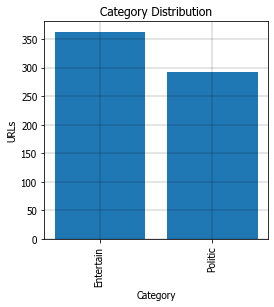

In [49]:
cat_ratio = df_join.groupby(['Category']).agg({'URL': lambda x: len(x)}).reset_index()
plt.figure(figsize=(4,4))
plt.grid(color='k', linestyle='-', linewidth=0.2)
x=cat_ratio.Category
plt.bar(x, cat_ratio.URL)
plt.xticks(cat_ratio.index,rotation='vertical')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('URLs')
plt.show()

In [50]:
cat_ratio

,Category,URL
0,Entertain,363
1,Politic,293


In [51]:
df_join.to_excel('bads7101_news_viral.xlsx',index=False)